## Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from requests.auth import HTTPBasicAuth
from bs4 import BeautifulSoup
import json
import pandas as pd

import sys
sys.path.append('..')

from utils.fig2_blocklist_utils import *

## Setup

In [10]:
# manual only
file_manual = '../data/raw/fig2/censys_manual.json'

# Read and load the JSON file
with open(file_manual, "r") as f:
    all_query_data = json.load(f)

# aggregate dns list
dns_list = []
for i in range(len(all_query_data)):
    dns_list.append(get_dns_names_from_query(all_query_data[i]))
dns_list = list(flatten_array(dns_list))

# aggregate ip list
ip_list = []
for i in range(len(all_query_data)):
    ip_list.append(get_ips_from_query(all_query_data[i]))
ip_list= list(flatten_array(ip_list))

len(ip_list)

298

In [11]:
# combined manual and llm result
file_manual_llm = '../data/raw/fig2/manual_llm_overlap.csv'
df = pd.read_csv(file_manual_llm)
ip_list_manual_llm = df['host']

len(ip_list_manual_llm)

8431

## Compile Blocklists

In [12]:
# blocklists
blocklist_pharmacy_list = read_ip_blocklists('../data/raw/fig2/blocklist_pharmacy_safe_ip.txt')
blocklist_pharmacy_list2 = read_ip_blocklists('../data/raw/fig2/blocklist_pharmacy_safe2_ip.txt')
blocklist_pharmacy_fda_warning_letters = read_ip_blocklists('../data/raw/fig2/blocklist_pharmacy_list_fda_warnings_ip.txt')
blocklist_firehol_level1 = read_ip_blocklists('../data/raw/fig2/blocklist_firehol_level1.netset',33)
blocklist_de = read_ip_blocklists('../data/raw/fig2/blocklist_de.ipset',30)
blocklist_net_ua = read_ip_blocklists('../data/raw/fig2/blocklist_net_ua.ipset',37)
blocklist_botscout_30d = read_ip_blocklists('../data/raw/fig2/blocklist_botscout_30d.ipset',37)
blocklist_spamhaus_drop = read_ip_blocklists('../data/raw/fig2/blocklist_spamhaus_drop.netset',33)
whitelist_pharmacy_list = read_ip_blocklists('../data/raw/fig2/whitelist_pharmacy_safe_ip.txt')

# length of each blocklist
print(len(blocklist_pharmacy_list))
print(len(blocklist_pharmacy_list2))
print(len(blocklist_pharmacy_fda_warning_letters))
print(len(blocklist_firehol_level1))
print(len(blocklist_de))
print(len(blocklist_net_ua))
print(len(blocklist_botscout_30d))
print(len(blocklist_spamhaus_drop))
print(len(whitelist_pharmacy_list))

15237
8824
48
4345
21504
72862
12976
1350
1470


## Compare Overlap

In [13]:
# manual
print(len(get_shared_entries(ip_list,blocklist_pharmacy_list)))
print(len(get_shared_entries(ip_list,blocklist_pharmacy_list2)))
print(len(get_shared_entries(ip_list,blocklist_pharmacy_fda_warning_letters)))
print(len(get_shared_entries(ip_list,blocklist_firehol_level1)))
print(len(get_shared_entries(ip_list,blocklist_de)))
print(len(get_shared_entries(ip_list,blocklist_net_ua)))
print(len(get_shared_entries(ip_list,blocklist_botscout_30d)))
print(len(get_shared_entries(ip_list,blocklist_spamhaus_drop)))
print(len(get_shared_entries(ip_list,whitelist_pharmacy_list)))
print()

# manual and llm
print(len(get_shared_entries(ip_list_manual_llm,blocklist_pharmacy_list)))
print(len(get_shared_entries(ip_list_manual_llm,blocklist_pharmacy_list2)))
print(len(get_shared_entries(ip_list_manual_llm,blocklist_pharmacy_fda_warning_letters)))
print(len(get_shared_entries(ip_list_manual_llm,blocklist_firehol_level1)))
print(len(get_shared_entries(ip_list_manual_llm,blocklist_de)))
print(len(get_shared_entries(ip_list_manual_llm,blocklist_net_ua)))
print(len(get_shared_entries(ip_list_manual_llm,blocklist_botscout_30d)))
print(len(get_shared_entries(ip_list_manual_llm,blocklist_spamhaus_drop)))
print(len(get_shared_entries(ip_list_manual_llm,whitelist_pharmacy_list)))

28
20
0
0
0
0
0
0
0

55
36
0
0
0
2
0
0
0


## Plot

In [14]:
# # Sample labels and data
# labels = ['pharmacy.safe blocklist', 'pharmacy.safe blocklist2', 'FDA Warning Letters', 'firehol_level1', 'blocklist_de', 'blocklist_net_ua', 'botscout_30d', 'spamhaus_drop', 
#              'pharmacy.safe whitelist']
# x = np.arange(len(labels))

# # Sample values
# detection_rate = [
#     len(get_shared_entries(ip_list,blocklist_pharmacy_list))/len(ip_list),
#     len(get_shared_entries(ip_list,blocklist_pharmacy_list2))/len(ip_list),
#     len(get_shared_entries(ip_list,blocklist_pharmacy_fda_warning_letters))/len(ip_list),
#     len(get_shared_entries(ip_list,blocklist_firehol_level1))/len(ip_list),
#     len(get_shared_entries(ip_list,blocklist_de))/len(ip_list),
#     len(get_shared_entries(ip_list,blocklist_net_ua))/len(ip_list),
#     len(get_shared_entries(ip_list,blocklist_botscout_30d))/len(ip_list),
#     len(get_shared_entries(ip_list,blocklist_spamhaus_drop))/len(ip_list),
#     len(get_shared_entries(ip_list,whitelist_pharmacy_list))/len(ip_list)
# ]
# blocklist_lengths = [
#     len(blocklist_pharmacy_list),
#     len(blocklist_pharmacy_list2),
#     len(blocklist_pharmacy_fda_warning_letters),
#     len(blocklist_firehol_level1),
#     len(blocklist_de),
#     len(blocklist_net_ua),
#     len(blocklist_botscout_30d),
#     len(blocklist_spamhaus_drop),
#     len(whitelist_pharmacy_list)
# ]

# # Create plot
# fig, ax1 = plt.subplots(figsize=(10, 5))
# width = 0.4

# # Left axis bars
# ax1.bar(x - width/2, detection_rate, width, label='Blocklist Detection Rate', color='crimson')
# ax1.set_ylabel('Detection Rate', color='crimson')
# ax1.set_ylim(0, 0.01)
# ax1.tick_params(axis='y', labelcolor='crimson')

# # Right axis bars
# ax2 = ax1.twinx()
# ax2.bar(x + width/2, blocklist_lengths, width, label='Blocklist Length', color='steelblue')
# ax2.set_ylabel('Blocklist Length', color='steelblue')
# ax2.tick_params(axis='y', labelcolor='steelblue')
# ax2.set_yscale('log')

# # set x-ticks and vertical labels
# ax1.set_xticks(x)
# ax1.set_xticklabels(labels, rotation=45)

# # Add x-axis label
# ax1.set_xlabel("Blocklist Source")

# # Make sure the bottom axis line is visible
# ax1.spines['bottom'].set_visible(True)

# plt.tight_layout()
# plt.grid()
# plt.show()


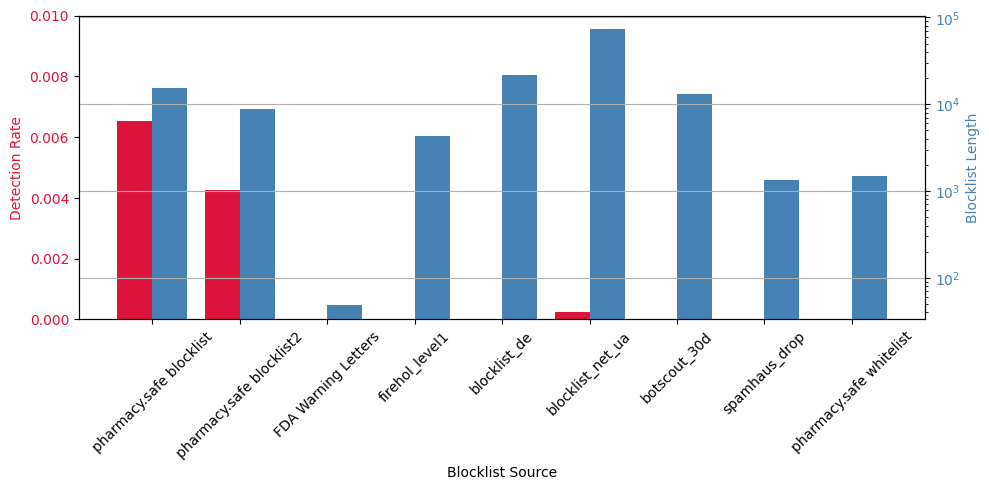

In [15]:
# Sample labels and data
labels = ['pharmacy.safe blocklist', 'pharmacy.safe blocklist2', 'FDA Warning Letters', 'firehol_level1', 'blocklist_de', 'blocklist_net_ua', 'botscout_30d', 'spamhaus_drop', 
             'pharmacy.safe whitelist']
x = np.arange(len(labels))

# Sample values
detection_rate = [
    len(get_shared_entries(ip_list_manual_llm,blocklist_pharmacy_list))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,blocklist_pharmacy_list2))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,blocklist_pharmacy_fda_warning_letters))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,blocklist_firehol_level1))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,blocklist_de))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,blocklist_net_ua))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,blocklist_botscout_30d))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,blocklist_spamhaus_drop))/len(ip_list_manual_llm),
    len(get_shared_entries(ip_list_manual_llm,whitelist_pharmacy_list))/len(ip_list_manual_llm)
]
blocklist_lengths = [
    len(blocklist_pharmacy_list),
    len(blocklist_pharmacy_list2),
    len(blocklist_pharmacy_fda_warning_letters),
    len(blocklist_firehol_level1),
    len(blocklist_de),
    len(blocklist_net_ua),
    len(blocklist_botscout_30d),
    len(blocklist_spamhaus_drop),
    len(whitelist_pharmacy_list)
]

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 5))
width = 0.4

# Left axis bars
ax1.bar(x - width/2, detection_rate, width, label='Blocklist Detection Rate', color='crimson')
ax1.set_ylabel('Detection Rate', color='crimson')
ax1.set_ylim(0, 0.01)
ax1.tick_params(axis='y', labelcolor='crimson')

# Right axis bars
ax2 = ax1.twinx()
ax2.bar(x + width/2, blocklist_lengths, width, label='Blocklist Length', color='steelblue')
ax2.set_ylabel('Blocklist Length', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.set_yscale('log')

# set x-ticks and vertical labels
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45)

# Add x-axis label
ax1.set_xlabel("Blocklist Source")

# Make sure the bottom axis line is visible
ax1.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.grid()
plt.savefig('../figures/fig2_blocklist_manual_llm.jpg')


In [16]:
len(ip_list_manual_llm)

8431